# Use Detail Age to Predict

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

 558_Assignments_Code		     'Foundation Financial Project.ipynb'
 5-Mortality-Model_1_22.ipynb	      Kaggle
 data				      my_own_code
'Fondation Final Project_Mortality'  'powerful word.ipynb'


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics

# Model Data Set Generating - mdl_data

In [0]:
'''Loading Data from selected mortality dataset(only 15 columns)'''

df=[] #len=11, each = 1yr
for i in range(2005,2016):
    url = '/content/drive/My Drive/Colab Notebooks/Fondation Final Project_Mortality/data/mortality_selected/'+str(i)+'.csv'
    df1 = pd.read_csv(url)
    df.append(df1)
    print('Loading data of year',i)
del df1

Loading data of year 2005
Loading data of year 2006
Loading data of year 2007
Loading data of year 2008
Loading data of year 2009
Loading data of year 2010
Loading data of year 2011
Loading data of year 2012
Loading data of year 2013
Loading data of year 2014
Loading data of year 2015


In [0]:
df[0][:2]

,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,activity_code,race,5y_age_band_recode,rankable_cause_recode
0,11.0,NaN,0,1,F,45,M,2,2005,U,7.0,NaN,1,10,4
1,13.0,NaN,0,1,M,61,D,7,2005,U,7.0,NaN,1,13,13


In [0]:
'''drop unused columns'''
'''Used ones: Year, detail_age, Sex, Race, rankable_cause_recode，month_of_death，'marital_status' '''
#use year,sex,race,age_band, cause_recode
unused_cols = ['education_1989_revision','education_2003_revision','education_reporting_flag',
               'day_of_week_of_death','injury_at_work', 'manner_of_death', 'activity_code','5y_age_band_recode']
for i in range(11):
    df[i].drop(unused_cols, axis=1, inplace=True)
    print(df[i].columns.values)

['month_of_death' 'sex' 'detail_age' 'marital_status' 'current_data_year'
 'race' 'rankable_cause_recode']
['month_of_death' 'sex' 'detail_age' 'marital_status' 'current_data_year'
 'race' 'rankable_cause_recode']
['month_of_death' 'sex' 'detail_age' 'marital_status' 'current_data_year'
 'race' 'rankable_cause_recode']
['month_of_death' 'sex' 'detail_age' 'marital_status' 'current_data_year'
 'race' 'rankable_cause_recode']
['month_of_death' 'sex' 'detail_age' 'marital_status' 'current_data_year'
 'race' 'rankable_cause_recode']
['month_of_death' 'sex' 'detail_age' 'marital_status' 'current_data_year'
 'race' 'rankable_cause_recode']
['month_of_death' 'sex' 'detail_age' 'marital_status' 'current_data_year'
 'race' 'rankable_cause_recode']
['month_of_death' 'sex' 'detail_age' 'marital_status' 'current_data_year'
 'race' 'rankable_cause_recode']
['month_of_death' 'sex' 'detail_age' 'marital_status' 'current_data_year'
 'race' 'rankable_cause_recode']
['month_of_death' 'sex' 'detail_age' 

In [0]:
mdl_data = df[0]
for i in range(1,11):
  mdl_data = pd.concat([mdl_data,df[i]], axis=0)
#print(mdl_data['current_data_year'].unique())
del df

In [0]:
mdl_data = mdl_data[mdl_data['rankable_cause_recode'].isin([7])]

In [0]:
mdl_data

,month_of_death,sex,detail_age,marital_status,current_data_year,race,rankable_cause_recode
18,1,M,64,D,2005,1,7
31,1,M,50,M,2005,1,7
42,1,M,73,M,2005,3,7
54,1,M,49,W,2005,68,7
58,1,M,63,W,2005,1,7
...,...,...,...,...,...,...,...
2718187,12,M,86,U,2015,1,7
2718190,11,F,39,U,2015,2,7
2718194,12,F,48,U,2015,1,7
2718196,7,M,83,U,2015,2,7


In [0]:
'''Store unique value for each predictor'''

'''year = mdl_data['current_data_year'].unique()
sex = mdl_data['sex'].unique()
race = sorted(mdl_data['race'].unique())
age = sorted(mdl_data['5y_age_band_recode'].unique())
cause = sorted(mdl_data['rankable_cause_recode'].unique())
print(year)
print(sex)
print(race)
print(age)
print(cause)'''

In [0]:
gbydata = mdl_data.groupby(by=['sex', 'current_data_year', 'race', 'detail_age','month_of_death','marital_status']).size()

In [0]:
gbydata.values

array([3, 2, 5, ..., 1, 1, 1])

In [0]:
x = []
for i in range(gbydata.size):
  x.append(list(gbydata.index.values[i]))
#x

In [0]:
mdl_data = pd.DataFrame(data=x, columns=['sex', 'current_data_year', 'race', 'detail_age','month_of_death','marital_status' ])
mdl_data['death_num'] = gbydata.values
mdl_data

,sex,current_data_year,race,detail_age,month_of_death,marital_status,death_num
0,F,2005,1,1,1,S,3
1,F,2005,1,1,2,S,2
2,F,2005,1,1,3,S,5
3,F,2005,1,1,4,S,2
4,F,2005,1,1,5,S,3
...,...,...,...,...,...,...,...
290169,M,2015,78,97,4,W,1
290170,M,2015,78,97,7,W,1
290171,M,2015,78,98,3,W,1
290172,M,2015,78,99,1,W,1


# Data Wrangling

In [0]:
mdl_data.describe()

,current_data_year,race,detail_age,month_of_death,death_num,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,marital_D,marital_M,marital_S,marital_U,marital_W,pred1
count,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.00000,289832.000000,289832.000000,289832.000000,289832.000000,289832.00000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000,289832.000000
mean,2010.084066,9.285179,67.594648,6.476735,23.400118,0.472722,0.527278,0.33046,0.037529,0.280466,0.022655,0.077045,0.00520,0.052465,0.020515,0.042004,0.002170,0.006531,0.047614,0.056750,0.018597,0.086705,0.082686,0.083200,0.086557,0.083717,0.085777,0.082989,0.083145,0.081654,0.082058,0.081088,0.080422,0.172286,0.296575,0.214159,0.078276,0.238704,23.400118
std,3.163526,18.604959,21.429028,3.480836,71.967992,0.499256,0.499256,0.47038,0.190054,0.449228,0.148800,0.266663,0.07192,0.222963,0.141755,0.200598,0.046535,0.080553,0.212948,0.231365,0.135097,0.281403,0.275407,0.276185,0.281185,0.276964,0.280035,0.275867,0.276101,0.273838,0.274453,0.272971,0.271947,0.377629,0.456748,0.410238,0.268606,0.426292,43.027454
min,2005.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023936
25%,2007.000000,1.000000,53.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.541641
50%,2010.000000,2.000000,70.000000,6.000000,3.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.070717
75%,2013.000000,5.000000,84.000000,10.000000,13.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,22.940591
max,2015.000000,78.000000,125.000000,12.000000,1084.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,428.971768


## death number distribution

In [0]:
mdl_data.groupby(by=['death_num']).size().sort_index(ascending=False)

death_num
1084         1
1061         1
1045         1
1038         1
1022         1
         ...  
5         8558
4        11442
3        18094
2        35429
1       105801
Length: 928, dtype: int64

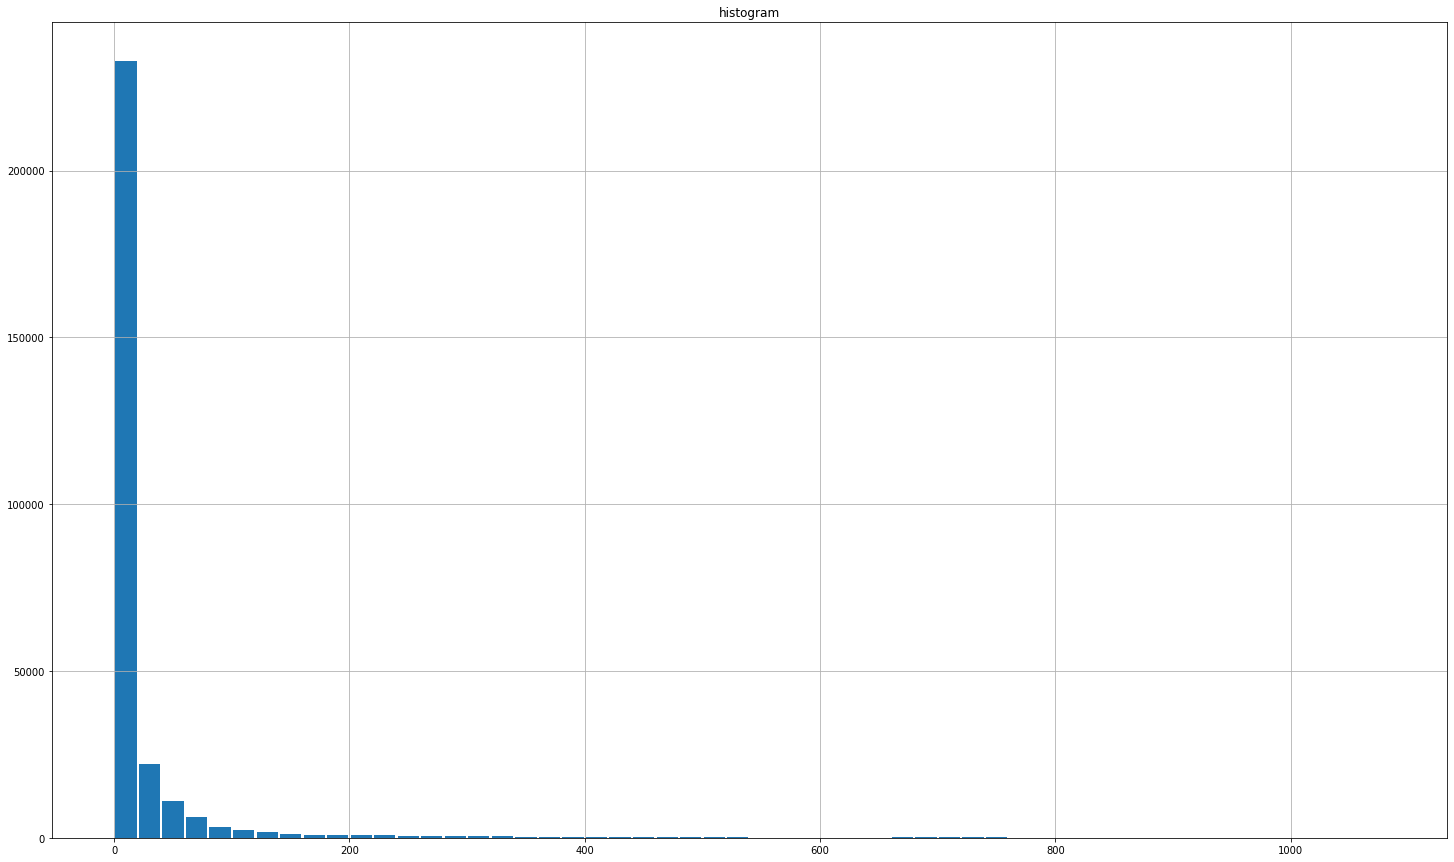

In [0]:
plt.figure(figsize=(25,15))
plt.hist(mdl_data['death_num'], bins=np.arange(0, 1090,20), rwidth=0.9)
#plt.ylim(0,100)
#plt.xlim(0,9000)
plt.grid(axis='both')
plt.title("histogram")
plt.show()

## year, sex, race, age, month, marital_status distribution

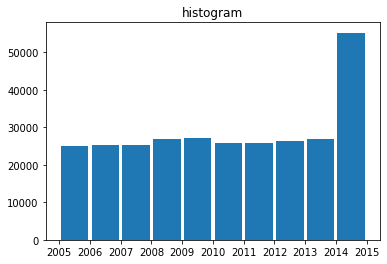

In [0]:
#year
#np.unique(mdl_data['current_data_year'])
binblock=np.arange(2005,2016, 1)
plt.hist(mdl_data['current_data_year'], bins = binblock, rwidth=0.9)
plt.title("histogram")
plt.xticks(np.arange(2005,2016))
plt.show()

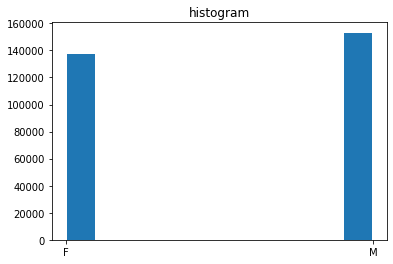

In [0]:
#sex
#np.unique(mdl_data['current_data_year'])
#binblock=np.arange(2005,2016, 1)
plt.hist(mdl_data['sex'], rwidth=0.9)
plt.title("histogram")
#plt.xticks(np.arange(2005,2016))
plt.show()

In [0]:
np.unique(mdl_data['race'])

array([ 1,  2,  3,  4,  5,  6,  7, 18, 28, 38, 48, 58, 68, 78])

In [0]:
mdl_data['race_str'] = mdl_data['race'].astype(str)

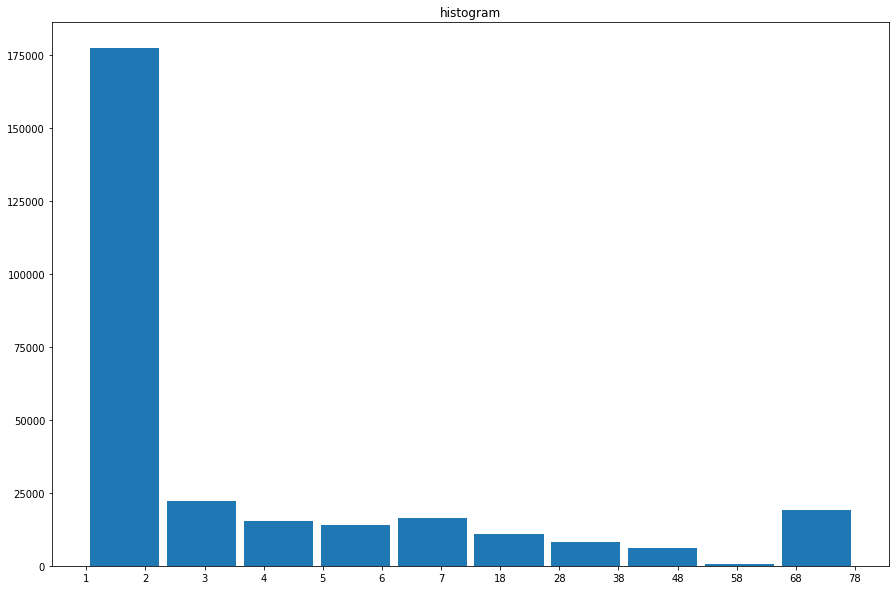

In [0]:
#race
#np.unique(mdl_data['sex'])
plt.figure(figsize=(15,10))
#binblock=np.arange(1,79, 1)
plt.hist(mdl_data['race_str'], rwidth=0.9)
plt.title("histogram")
#plt.xticks(np.arange(1,79))
plt.show()

In [0]:
np.unique(mdl_data['detail_age'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118,
       122, 125, 999])

In [0]:
#drop data with 999 age
mdl_data = mdl_data[~mdl_data['detail_age'].isin([999])]
#mdl_data['detail_age'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 116, 114, 115, 118, 113,
       122, 125])

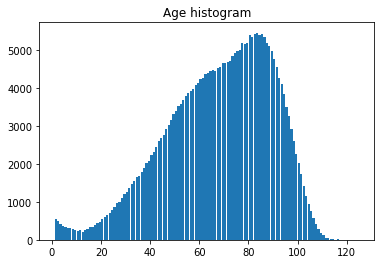

In [0]:
#gae
#np.unique(mdl_data['sex'])
plt.hist(mdl_data['detail_age'], bins=np.arange(1,126), rwidth=0.9)
plt.title("Age histogram")
#plt.xticks(np.arange(2005,2016))
plt.show()

In [0]:
mdl_data['month_str'] = mdl_data['month_of_death'].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


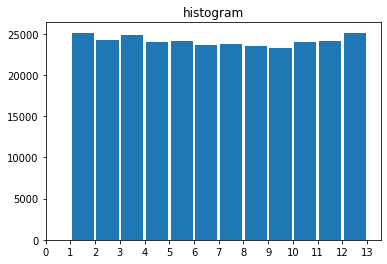

In [0]:
# month of death
plt.hist(mdl_data['month_of_death'], bins=np.arange(1,14), rwidth=0.9)
plt.title("histogram")
plt.xticks(np.arange(14),('0','1','2','3','4','5','6','7','8','9','10','11','12','13'))
plt.xlim(left=0)
plt.show()

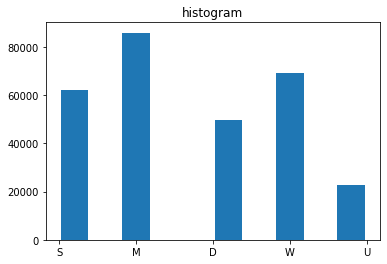

In [0]:
# marital_status
plt.hist(mdl_data['marital_status'], rwidth=0.9)
plt.title("histogram")
#plt.xticks(np.arange(5),('S', 'M','D','W','U'))
#plt.xlim(left=0)
plt.show()

# Relation Visualization



## current_data_year ~ death number

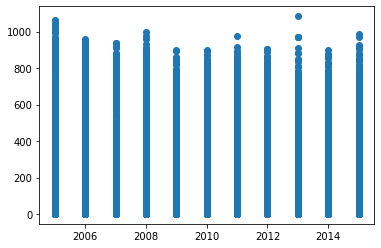

In [0]:
plt.scatter(mdl_data['current_data_year'], mdl_data['death_num'])
plt.show()

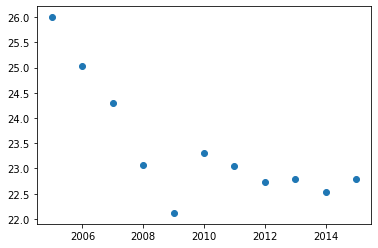

In [0]:
dnum_year = mdl_data[['current_data_year','death_num']].groupby('current_data_year').mean().reset_index()
plt.scatter(dnum_year['current_data_year'], dnum_year['death_num'])
plt.show()

## sex - death number relation


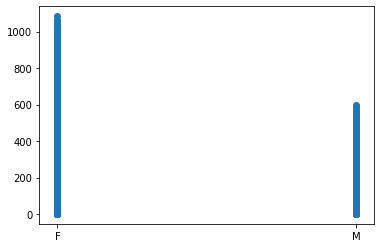

In [0]:
plt.scatter(mdl_data['sex'], mdl_data['death_num'])
plt.show()

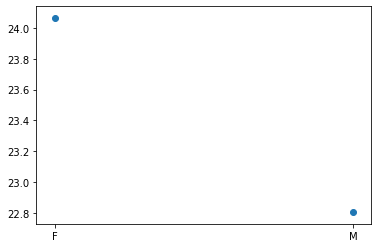

In [0]:
dnum_sex = mdl_data[['sex','death_num']].groupby('sex').mean().reset_index()
plt.scatter(dnum_sex['sex'], dnum_sex['death_num'])
plt.show()

## Race ~ Death Number
problem: unbalanced number of death for various race
  need a percentage data of each race to solve the problem.

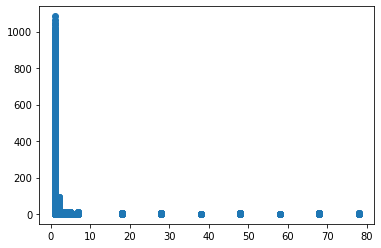

In [0]:
plt.scatter(mdl_data['race'], mdl_data['death_num'])
#x_labels = mdl_data['race'].unique().astype(str)
#plt.xticks()
plt.show()

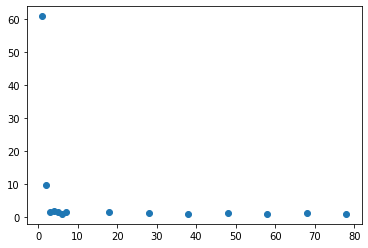

In [0]:
dnum_race = mdl_data[['race','death_num']].groupby('race').mean().reset_index()
plt.scatter(dnum_race['race'], dnum_race['death_num'])
plt.show()

## 5y_age_band_recode ~ Death Number

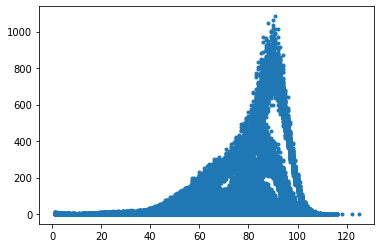

In [0]:
plt.scatter(mdl_data['detail_age'], mdl_data['death_num'], marker='.')
plt.show()

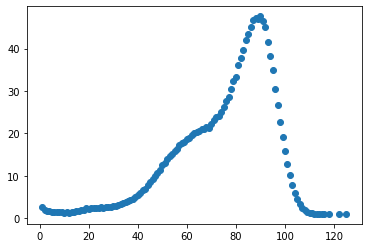

In [0]:
dnum_age = mdl_data[['detail_age','death_num']].groupby('detail_age').mean().reset_index()
plt.scatter(dnum_age['detail_age'], dnum_age['death_num'])
plt.show()

## Month ~ Death Number

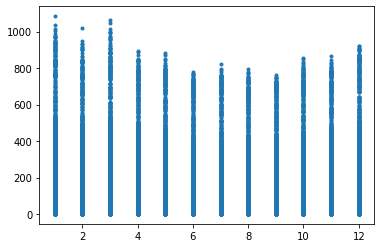

In [0]:
plt.scatter(mdl_data['month_of_death'], mdl_data['death_num'], marker='.')
plt.show()

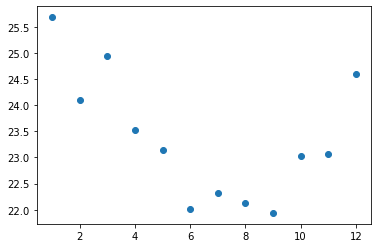

In [0]:
dnum_age = mdl_data[['month_of_death','death_num']].groupby('month_of_death').mean().reset_index()
plt.scatter(dnum_age['month_of_death'], dnum_age['death_num'])
plt.show()

# Feature Engineering

In [0]:
mdl_data

,sex,current_data_year,race,detail_age,month_of_death,marital_status,death_num,race_str,month_str
0,F,2005,1,1,1,S,3,1,1
1,F,2005,1,1,2,S,2,1,2
2,F,2005,1,1,3,S,5,1,3
3,F,2005,1,1,4,S,2,1,4
4,F,2005,1,1,5,S,3,1,5
...,...,...,...,...,...,...,...,...,...
290169,M,2015,78,97,4,W,1,78,4
290170,M,2015,78,97,7,W,1,78,7
290171,M,2015,78,98,3,W,1,78,3
290172,M,2015,78,99,1,W,1,78,1


In [0]:
sex_onehot = pd.get_dummies(mdl_data['sex'],prefix='sex')
#mdl_data['racestr'] = mdl_data['race'].astype(str)
race_onehot = pd.get_dummies(mdl_data['race_str'],prefix='race')
month_onehot = pd.get_dummies(mdl_data['month_str'],prefix='month')
marital_onehot = pd.get_dummies(mdl_data['marital_status'], prefix='marital')
mdl_data = pd.concat([mdl_data, sex_onehot, race_onehot, month_onehot, marital_onehot], axis=1)
mdl_data

,sex,current_data_year,race,detail_age,month_of_death,marital_status,death_num,race_str,month_str,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,marital_D,marital_M,marital_S,marital_U,marital_W
0,F,2005,1,1,1,S,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,F,2005,1,1,2,S,2,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,F,2005,1,1,3,S,5,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,F,2005,1,1,4,S,2,1,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,F,2005,1,1,5,S,3,1,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290169,M,2015,78,97,4,W,1,78,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
290170,M,2015,78,97,7,W,1,78,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
290171,M,2015,78,98,3,W,1,78,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
290172,M,2015,78,99,1,W,1,78,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Modeling 1st Try

In [0]:
mdl_data.columns

Index(['sex', 'current_data_year', 'race', 'detail_age', 'month_of_death',
       'marital_status', 'death_num', 'race_str', 'month_str', 'sex_F',
       'sex_M', 'race_1', 'race_18', 'race_2', 'race_28', 'race_3', 'race_38',
       'race_4', 'race_48', 'race_5', 'race_58', 'race_6', 'race_68', 'race_7',
       'race_78', 'month_1', 'month_10', 'month_11', 'month_12', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'marital_D', 'marital_M', 'marital_S', 'marital_U',
       'marital_W'],
      dtype='object')

In [0]:
X=mdl_data[['current_data_year', 'detail_age', 
        'sex_F', 'sex_M', 'race_1', 'race_18', 'race_2', 'race_28',
       'race_3', 'race_38', 'race_4', 'race_48', 'race_5', 'race_58', 'race_6',
       'race_68', 'race_7', 'race_78', 'month_1', 'month_10', 'month_11',
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'marital_D', 'marital_M', 'marital_S',
       'marital_U', 'marital_W']]
y=mdl_data['death_num']
X=sm.add_constant(X)
X

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,current_data_year,detail_age,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,marital_D,marital_M,marital_S,marital_U,marital_W
0,1.0,2005,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,2005,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1.0,2005,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1.0,2005,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1.0,2005,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290169,1.0,2015,97,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
290170,1.0,2015,97,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
290171,1.0,2015,98,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
290172,1.0,2015,99,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
model_1 = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print (model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              death_num   No. Observations:               289832
Model:                            GLM   Df Residuals:                   289800
Model Family:                 Poisson   Df Model:                           31
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.0223e+06
Date:                Fri, 29 Nov 2019   Deviance:                   7.0533e+06
Time:                        21:40:32   Pearson chi2:                 7.94e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.6324      0.13

In [0]:
mdl_data['pred1'] = model_1.predict(X)
mdl_data

,sex,current_data_year,race,detail_age,month_of_death,marital_status,death_num,race_str,month_str,sex_F,sex_M,race_1,race_18,race_2,race_28,race_3,race_38,race_4,race_48,race_5,race_58,race_6,race_68,race_7,race_78,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,marital_D,marital_M,marital_S,marital_U,marital_W,pred1
0,F,2005,1,1,1,S,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.338708
1,F,2005,1,1,2,S,2,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5.789001
2,F,2005,1,1,3,S,5,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,6.104982
3,F,2005,1,1,4,S,2,1,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,5.633472
4,F,2005,1,1,5,S,3,1,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,5.591902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290169,M,2015,78,97,4,W,1,78,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.524356
290170,M,2015,78,97,7,W,1,78,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2.380309
290171,M,2015,78,98,3,W,1,78,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2.793964
290172,M,2015,78,99,1,W,1,78,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.962778


In [0]:
print('In Sample MSE: {}'.format(metrics.mean_squared_error(mdl_data['death_num'], mdl_data['pred1'])))
print('In Sample R2: {}'.format(metrics.r2_score(mdl_data['death_num'], mdl_data['pred1'])))

In Sample MSE: 3319.293892939312
In Sample R2: 0.35913221842302734


## Interpretion & Visualize

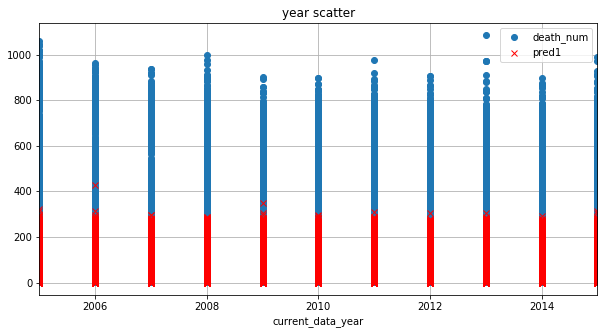

In [0]:
# Year
mdl_data.plot(x='current_data_year', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('year scatter')
plt.show()

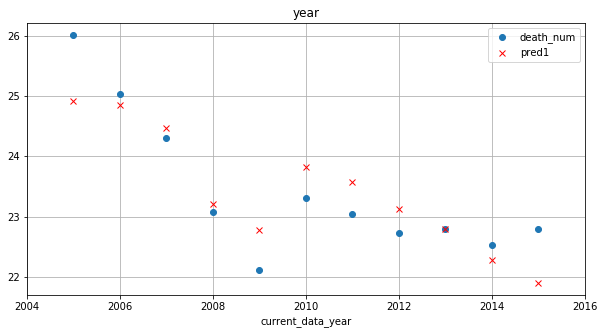

In [0]:
data_agg=mdl_data[['pred1','death_num', 'current_data_year']].groupby('current_data_year').mean().reset_index()
data_agg.plot(x='current_data_year', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.xlim(2004,2016)
plt.title('year')
plt.show()

In [0]:
# detail_age

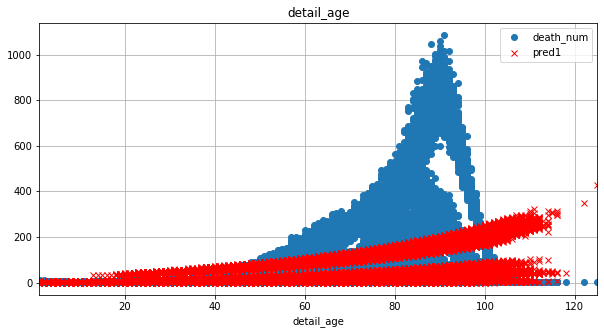

In [0]:
mdl_data.plot(x='detail_age', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('detail_age')
plt.show()

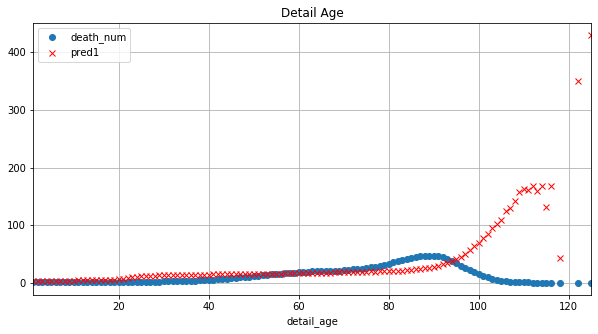

In [0]:
data_agg=mdl_data[['pred1','death_num', 'detail_age']].groupby('detail_age').mean().reset_index()
data_agg.plot(x='detail_age', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
#plt.xlim(2004,2016)
plt.title('Detail Age')
plt.show()

In [0]:
# Sex

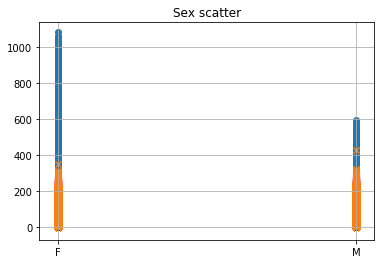

In [0]:
plt.scatter(x=mdl_data['sex'], y=mdl_data['death_num'])
plt.scatter(x=mdl_data['sex'], y=mdl_data['pred1'], marker='x')
#mdl_data.plot(x='sex', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.title('Sex scatter')
plt.show()

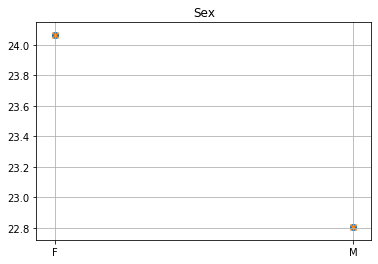

In [0]:
data_agg=mdl_data[['pred1','death_num', 'sex']].groupby('sex').mean().reset_index()
plt.scatter(x=data_agg['sex'], y=data_agg['death_num'])
plt.scatter(x=data_agg['sex'], y=data_agg['pred1'], marker='x')
plt.grid(axis='both')
plt.title('Sex')
plt.show()

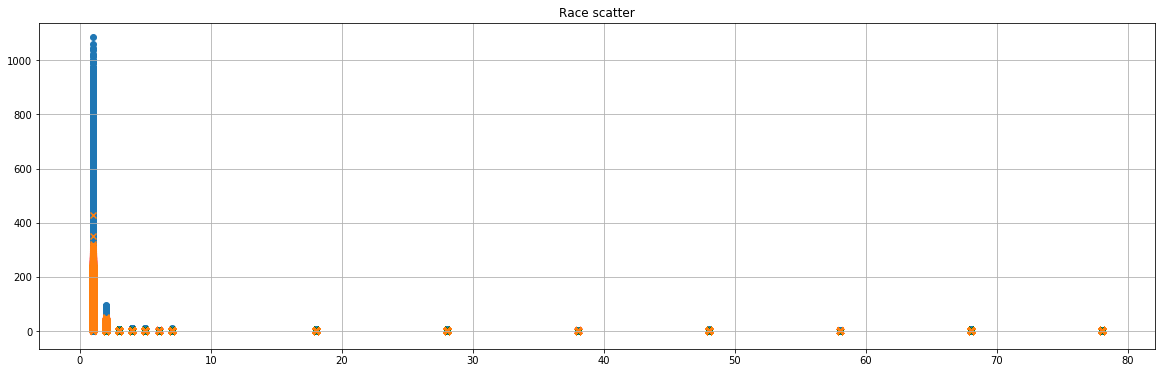

In [0]:
plt.figure(figsize=(20,6))
plt.scatter(x=mdl_data['race'], y=mdl_data['death_num'])
plt.scatter(x=mdl_data['race'], y=mdl_data['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.title('Race scatter')
plt.show()

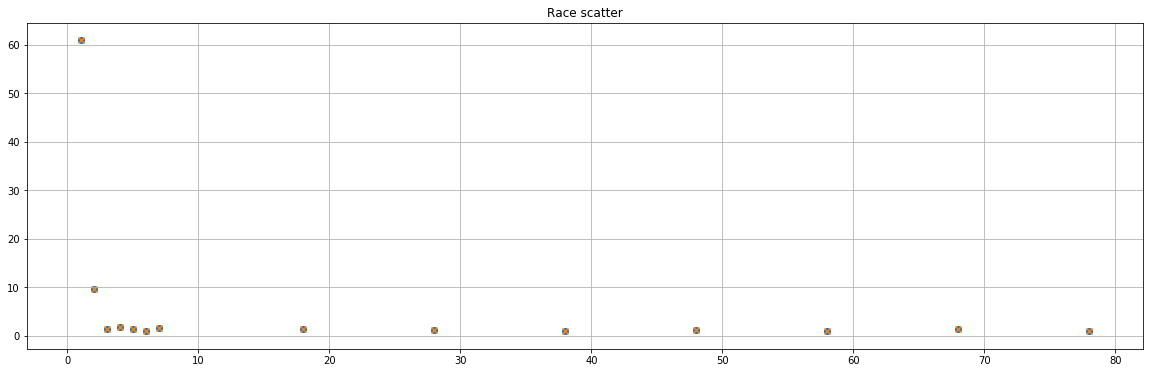

In [0]:
data_agg=mdl_data[['pred1','death_num', 'race']].groupby('race').mean().reset_index()
plt.figure(figsize=(20,6))
plt.scatter(x=data_agg['race'], y=data_agg['death_num'])
plt.scatter(x=data_agg['race'], y=data_agg['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.title('Race scatter')
plt.show()

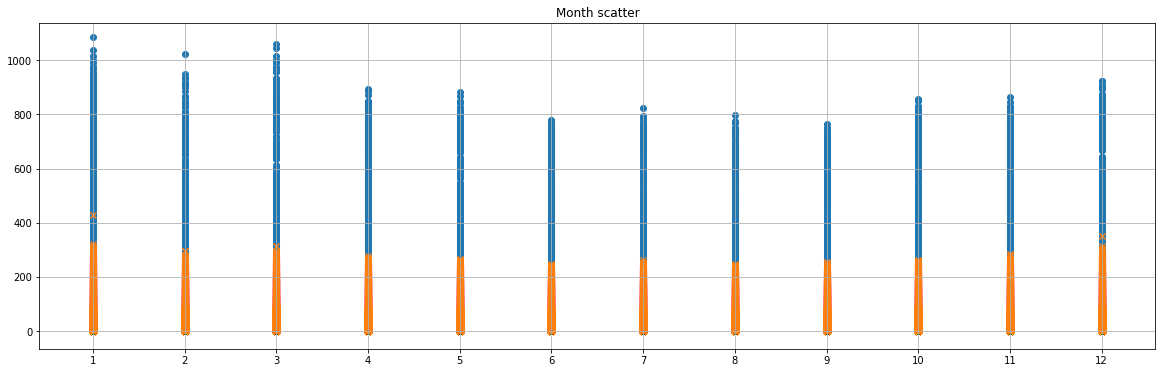

In [0]:
# Month of Death
plt.figure(figsize=(20,6))
plt.scatter(x=mdl_data['month_of_death'], y=mdl_data['death_num'])
plt.scatter(x=mdl_data['month_of_death'], y=mdl_data['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.xticks(np.arange(1,13))
plt.title('Month scatter')
plt.show()

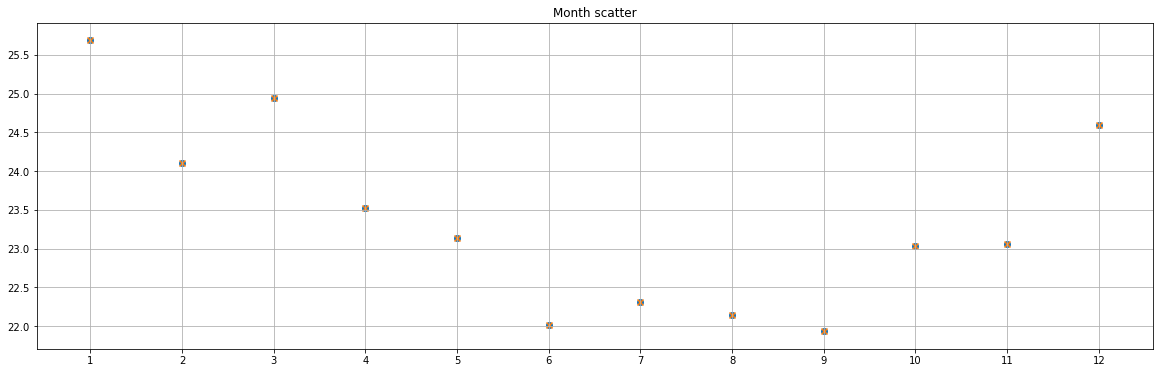

In [0]:
data_agg=mdl_data[['pred1','death_num', 'month_of_death']].groupby('month_of_death').mean().reset_index()

plt.figure(figsize=(20,6))
plt.scatter(x=data_agg['month_of_death'], y=data_agg['death_num'])
plt.scatter(x=data_agg['month_of_death'], y=data_agg['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
plt.xticks(np.arange(1,13))
plt.title('Month scatter')
plt.show()

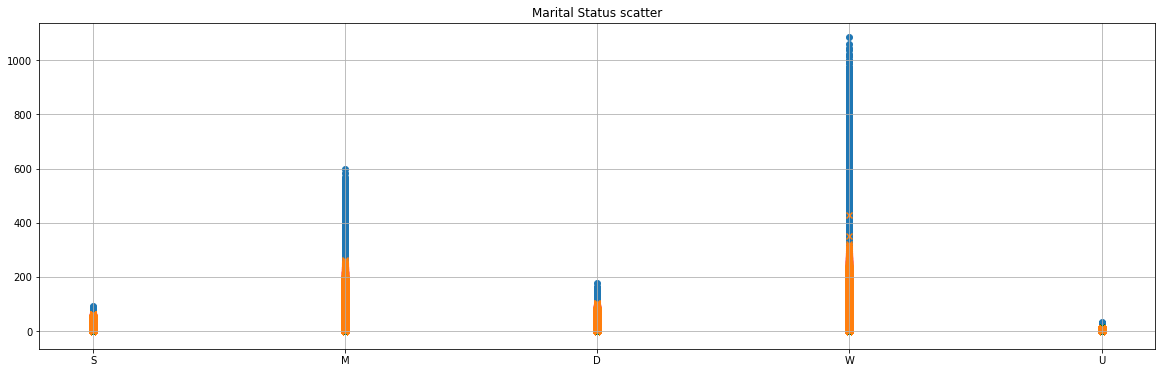

In [0]:
#marital Status
plt.figure(figsize=(20,6))
plt.scatter(x=mdl_data['marital_status'], y=mdl_data['death_num'])
plt.scatter(x=mdl_data['marital_status'], y=mdl_data['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
#plt.xticks(np.arange(1,13))
plt.title('Marital Status scatter')
plt.show()

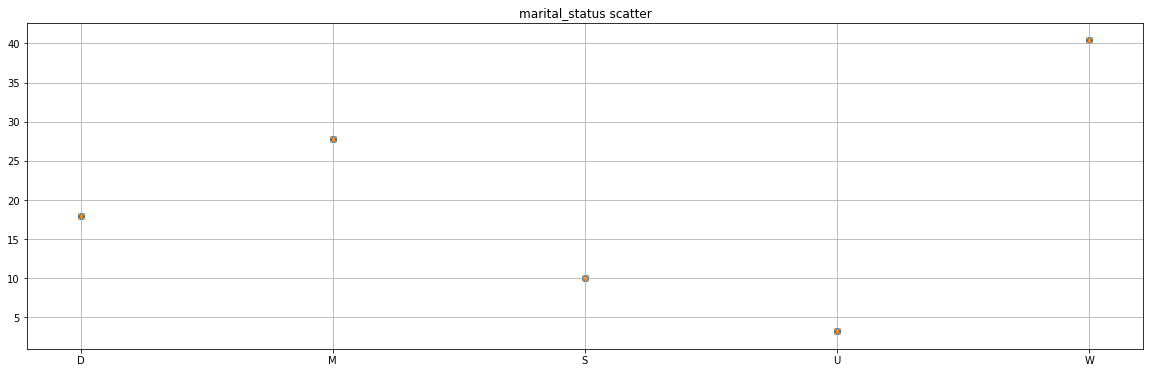

In [0]:
data_agg=mdl_data[['pred1','death_num', 'marital_status']].groupby('marital_status').mean().reset_index()

plt.figure(figsize=(20,6))
plt.scatter(x=data_agg['marital_status'], y=data_agg['death_num'])
plt.scatter(x=data_agg['marital_status'], y=data_agg['pred1'], marker='x')
#mdl_data.plot(x='race', y=['death_num', 'pred1'], figsize=(10,5), grid=True, style=['o','rx'])
plt.grid(axis='both')
#plt.xticks(np.arange(1,13))
plt.title('marital_status scatter')
plt.show()

# Detail Age Engineering

In [0]:
mdl_data['detail_age'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 116, 114, 115, 118, 113,
       122, 125])

In [0]:
 mdl_data['detail_age']

0           1
1           1
2           1
3           1
4           1
         ... 
290169     97
290170     97
290171     98
290172     99
290173    102
Name: detail_age, Length: 289832, dtype: int64